# **2장. 머신러닝의 기초 모델 이해하기 — 회귀와 분류**

## **2-3절 문자형 피쳐의 처리 방법**


## 다중 공선성 문제와 해결 방법

📌[실습 02-47] 데이터 프레임 생성하기

In [ ]:
import pandas as pd

X=pd.DataFrame(["사과", "바나나", "포도"], columns=["과일"])
print(X); print("")
X_oh=pd.get_dummies(X).astype(int)
print("원핫 인코딩 결과")
print(X_oh)


    과일
0   사과
1  바나나
2   포도

원핫 인코딩 결과
   과일_바나나  과일_사과  과일_포도
0       0      1      0
1       1      0      0
2       0      0      1


📌[실습 02-48] 더미 변수 직접 제거하기

In [ ]:
X1=X_oh.drop(["과일_바나나"], axis=1)
print("바나나 제거")
print(X1)
print(" ")
X2=X_oh.drop(["과일_사과"], axis=1)
print("사과 제거")
print(X2)

바나나 제거
   과일_사과  과일_포도
0      1      0
1      0      0
2      0      1
 
사과 제거
   과일_바나나  과일_포도
0       0      0
1       1      0
2       0      1


📌[실습 02-49] 더미 변수를 자동으로 제거하기

In [ ]:
X=pd.DataFrame(["grape", "kiwi", "banana"], columns=["Fruit"])
print(X); print("")
print("첫 번째 더미 하나 제거")
X3=pd.get_dummies(X, drop_first=True).astype(int)
print(X3)

    Fruit
0   grape
1    kiwi
2  banana

첫 번째 더미 하나 제거
   Fruit_grape  Fruit_kiwi
0            1           0
1            0           1
2            0           0


## 회귀모델에 적용하기

라이브러리 설치

In [ ]:
# 한글 폰트 설치
!pip install koreanize_matplotlib
import koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 79.6 MB/s eta 0:00:00


📌[실습 02-50] 데이터 불러오기

In [ ]:
df=pd.read_csv("베이스볼.csv", encoding='cp949')
df

,max_speed,fourball,strikeout,era,hand
0,158,5,7,3.37,right
1,149,5,4,3.01,left
2,153,7,0,3.83,right
3,136,5,6,3.44,right
4,140,7,4,4.16,right
...,...,...,...,...,...
95,144,5,7,2.71,right
96,151,5,3,3.64,left
97,164,4,3,3.73,right
98,148,7,2,3.98,right


**탐색적 분석**

📌[실습 02-51] 집단별 분포의 차이 시각화하기

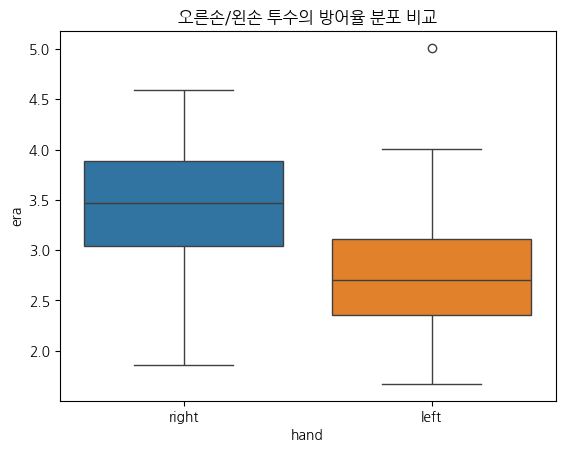

In [ ]:
sns.boxplot(x='hand', y='era', hue='hand', data=df)
plt.title("오른손/왼손 투수의 방어율 분포 비교")
plt.show()

📌[실습 02-52] 집단별 평균 확인하기

In [ ]:
df.groupby("hand")[["era"]].mean()

,era
hand,
left,2.788036
right,3.447045


📌[실습 02-53] 피처와 타깃을 지정하고 원핫 인코딩하기

In [ ]:
X=df[['strikeout', 'fourball', 'max_speed', 'hand']]
y=df['era']  # 9이닝당 방어율

X1=pd.get_dummies(X, drop_first=True).astype(int)
X1

,strikeout,fourball,max_speed,hand_right
0,7,5,158,1
1,4,5,149,0
2,0,7,153,1
3,6,5,136,1
4,4,7,140,1
...,...,...,...,...
95,7,5,144,1
96,3,5,151,0
97,3,4,164,1
98,2,7,148,1


📌[실습 02-54] 회귀 모델 학습하고 예측하기

In [ ]:
model=LinearRegression()
model.fit(X1, y)

print("가중치(weights)=", model.coef_)
print("편향(bias)=", model.intercept_); print()

y_pred=model.predict(X1) # 피쳐 X1을 사용하여 모형의 예측값 계산
MSE=mean_squared_error(y, y_pred)
print("평균제곱오차=", MSE)

가중치(weights)= [-0.14069533  0.06925533 -0.0073466   0.26627401]
편향(bias)= 4.4897541721056795

평균제곱오차= 0.20167528442829216


📌[실습 02-55] 45도 기준선을 추가한 산점도 그리기

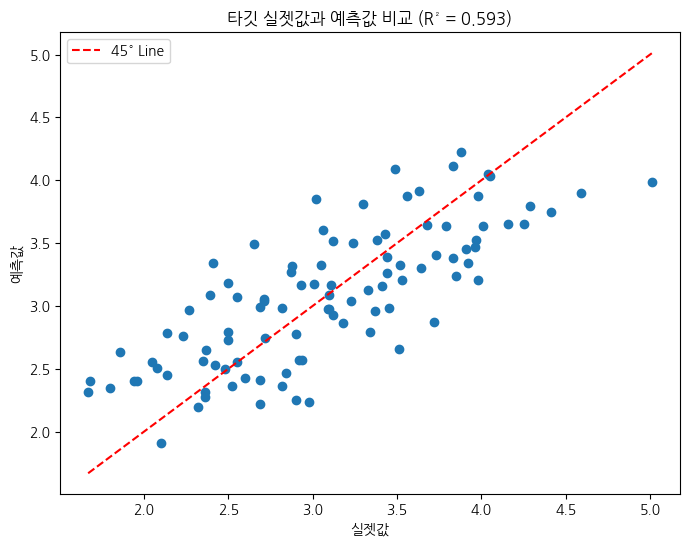

In [ ]:
y_pred=model.predict(X1)

from sklearn.metrics import mean_squared_error, r2_score
acc = r2_score(y, y_pred)  # R²예측력 계산

# 예측값과 실제값 비교 그림 (45도 일치선 방법)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='45° Line')

plt.title(f'타깃 실젯값과 예측값 비교 (R² = {acc:.3f})')
plt.xlabel('실젯값')
plt.ylabel('예측값')
plt.legend()
plt.show()

📌[실습 02-56] 학습된 모델로 투수의 방어율 예측하기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

print(X1.columns)  # X1 프레임의 열변수 이름 출력
print()
x_A=[[3,  5,  145, 1]]  # 선수 A (오른손), X1 컬럼순으로 입력되어야 함
x_B=[[3,  5,  145, 0]]  # 선수 B (왼손)
x_C=[[5,  1,  165, 1]]  # 선수 C (오른손)

print("투수 A의 ERA 예측값은 ",  model.predict(x_A), "입니다" ); print(" ")
print("투수 B의 ERA 예측값은 ",  model.predict(x_B), "입니다" ); print(" ")
print("투수 C의 ERA 예측값은 ",  model.predict(x_C), "입니다" )


Index(['strikeout', 'fourball', 'max_speed', 'hand_right'], dtype='object')

투수 A의 ERA 예측값은  [3.61496177] 입니다
 
투수 B의 ERA 예측값은  [3.34868776] 입니다
 
투수 C의 ERA 예측값은  [2.90961777] 입니다


## 분류 모델에 적용하기

라이브러리 불러오기

In [ ]:
import pandas as pd; import matplotlib.pyplot as plt
import numpy as np;  import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score

📌[실습 02-57] 데이터 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("브랜드선택.csv", encoding='cp949')
df

,표본_id,나이,소득,지역,브랜드
0,1,30,380,B,망고
1,2,33,290,B,키위
2,3,63,950,C,체리
3,4,24,420,A,망고
4,5,22,370,C,체리
...,...,...,...,...,...
195,196,43,480,A,키위
196,197,22,280,B,망고
197,198,50,730,A,체리
198,199,35,460,A,키위


📌[실습 02-59] 변숫값 확인하기

In [ ]:
df['지역'].unique()

array(['B', 'C', 'A'], dtype=object)

📌[실습 02-60] 지역별 브랜드 구성 비율 시각화하기

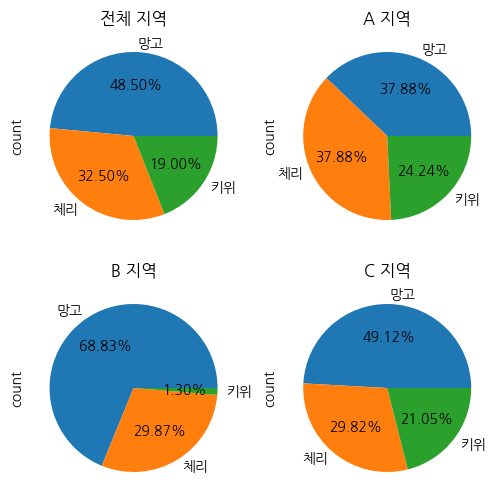

In [ ]:
plt.figure(figsize=(6, 6))
브랜드_이름=["망고","체리","키위"]

plt.subplot(2, 2, 1) # 전체 지역
df['브랜드'].value_counts().plot.pie(autopct='%.2f%%', labels=브랜드_이름)
plt.title("전체 지역")

plt.subplot(2, 2, 2) # A 지역
df[df['지역'] == 'A']['브랜드'].value_counts().plot.pie(autopct='%.2f%%',labels=브랜드_이름)
plt.title("A 지역")

plt.subplot(2, 2, 3)  # B 지역
df[df['지역'] == 'B']['브랜드'].value_counts().plot.pie(autopct='%.2f%%',labels=브랜드_이름)
plt.title("B 지역")

plt.subplot(2, 2, 4)   # C 지역
df[df['지역'] == 'C']['브랜드'].value_counts().plot.pie(autopct='%.2f%%',labels=브랜드_이름)
plt.title("C 지역")
plt.show()

📌[실습 02-61] 피처와 타깃 지정하고 원핫 인코딩하기

In [ ]:
X=df[["나이", "소득", "지역"]]

# 타겟을  정수로 라벨 인코딩 (로지스틱 모형에 사용하기 위해)
le = LabelEncoder()
df['브랜드_idx']=le.fit_transform(df['브랜드'])
y=df['브랜드_idx']
#print(y)

# 피쳐를 원핫 인코딩
X1=pd.get_dummies(X, drop_first=True).astype(int)
print(X1.head())



   나이   소득  지역_B  지역_C
0  30  380     1     0
1  33  290     1     0
2  63  950     0     1
3  24  420     0     0
4  22  370     0     1


📌[실습 02-62] 로지스틱 회귀 모델 적용하기


가중치 (클래스별):
[[-0.21172736  0.00454713  1.96907131  0.90626727]
 [ 0.01008297  0.01817708 -1.70899502 -0.35777038]
 [ 0.20164438 -0.02272422 -0.26007629 -0.54849688]]
편향 (클래스별):
[ 5.01710329 -8.87880479  3.8617015 ]

크로스 엔트로피 손실: 0.3599653410906194


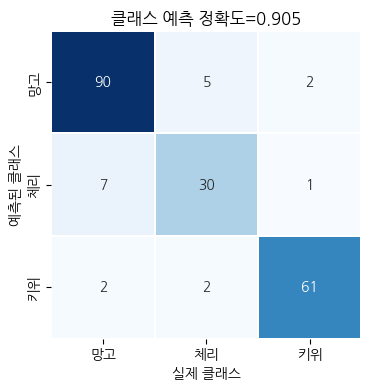

In [ ]:
# 로지스틱 회귀 분석
model=LogisticRegression(max_iter=2000)
model.fit(X1, y)  # 원핫 인코딩된 피쳐 X1 사용

y_prob=model.predict_proba(X1)
y_pred=model.predict(X1); print()

# 파라미터  출력
print("가중치 (클래스별):")
print(model.coef_)
print("편향 (클래스별):")
print(model.intercept_); print()

# 크로스 엔트로피 계산
loss=log_loss(y, y_prob)
print("크로스 엔트로피 손실:", loss)

# 혼동 행렬과 예측 정확도
class_labels=["망고", "체리", "키위"] # 클래스 이름 리스트 (인덱스 순서대로)
cm=confusion_matrix(y, y_pred)        # 혼동행렬 계산
acc=accuracy_score(y, y_pred)         # 실제 클래스와 예측 클래스의 일치 비율 계산

# 시각화
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True,linewidths=0.1, cmap='Blues', cbar=None,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title(f'클래스 예측 정확도={acc:.3f}')
plt.xlabel('실제 클래스'); plt.ylabel('예측된 클래스'); plt.show()


📌[실습 02-63] 학습된 로지스틱 회귀 모델로 예측하기

In [ ]:
print(X1.columns)  # 모델에 설정한 대로 피쳐를 입력
print()
# 고객별 피처 설정
x_A=[[20, 300,  0, 0]]   # 지역 A 거주
x_B=[[30, 300,  1, 0]]   # 지역 B 거주
x_C=[[50, 600,  0, 1]]   # 지역 C 거주

# 클래스별 확률 예측
prob_A=model.predict_proba(x_A)
prob_B=model.predict_proba(x_B)
prob_C=model.predict_proba(x_C)
# 확률이 가장 높은 클래스 인덱스
pred_index_A=model.predict(x_A)
pred_index_B=model.predict(x_B)
pred_index_C=model.predict(x_C)
# 예측 결과 출력
print(f"고객 A는 {np.max(prob_A):.3f}의 확률로  {le.inverse_transform(pred_index_A)}를 선택할 것으로 예측됩니다" )
print()
print(f"고객 B는 {np.max(prob_B):.3f}의 확률로  {le.inverse_transform(pred_index_B)}를 선택할 것으로 예측됩니다" )
print()
print(f"고객 C는 {np.max(prob_C):.3f}의 확률로  {le.inverse_transform(pred_index_C)}를 선택할 것으로 예측됩니다" )

Index(['나이', '소득', '지역_B', '지역_C'], dtype='object')

고객 A는 0.742의 확률로  ['망고']를 선택할 것으로 예측됩니다

고객 B는 0.697의 확률로  ['키위']를 선택할 것으로 예측됩니다

고객 C는 0.904의 확률로  ['체리']를 선택할 것으로 예측됩니다
